In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.2
/Users/villaa/nrFano_paper2019/mplstyles


In [2]:
import prob_dist as pd
import EdwRes as er
import time
import imp
imp.reload(pd)

#get the resolutions                                                                              
sigHv,sigIv,sigQerv,sigH_NRv,sigI_NRv,sigQnrv = \
 er.getEdw_det_res('GGA3',4.0,'data/edw_res_data.txt',aH=0.0381,C=None) 

fF = pd.QEr_v2_2D_fast(sigHv,sigIv,4.0,3.0,0.00000001,Qbar=lambda x: 0.16*x**0.18)                            
gF = pd.expband_2D(fF,(1/18.0),1.5)



start = time.time()
fF(0.1,10.0,10.0)
end = time.time()
print('Analytic Expression: {:1.5f} sec.'.format(end-start))

start = time.time()
gF(0.1,10.0)
end = time.time()
print('Numerical Integration: {:1.5f} sec.'.format(end-start))

start = time.time()
pd.analytical_NRQ_dist(0.1) 
end = time.time()
print('Analytic Integration: {:1.5f} sec.'.format(end-start))

start = time.time()
np.sqrt(pd.analytical_NRQ_var(10))
end = time.time()
print('Analytic Integration (sigma): {:1.5f} sec.'.format(end-start))

start = time.time()
np.sqrt(pd.series_NRQ_var(100,A=1.0,B=0.0))
end = time.time()
print('Series Approximation (sigma): {:1.5f} sec.'.format(end-start))

start = time.time()
np.sqrt(pd.series_NRQ_var_corr1(24.5,A=0.16,B=0.18))
end = time.time()
print('Once Corrected Series Approximation (sigma): {:1.5f} sec.'.format(end-start))

start = time.time()
np.sqrt(pd.series_NRQ_var_corr2(24.5,A=0.16,B=0.18)) #need to use an energy with second-order correction map
end = time.time()
print('Twice Corrected Series Approximation (sigma): {:1.5f} sec.'.format(end-start))

start = time.time()
sigQnrv(10)
end = time.time()
print('Edw. Expression (sigma): {:1.5f} sec.'.format(end-start))

start = time.time()
pd.sigmomEdw(20,band='NR',label='GGA3',F=0.000001,V=4.0,aH=0.0381,alpha=(1/18.0))
end = time.time()
print('Normalization and Integration: {:1.5f} sec.'.format(end-start))

start = time.time()
np.sin(np.pi)
end = time.time()
print('sin function: {:1.5f} sec.'.format(end-start))

GGA3/NR/4.0/5.556E-02/0.0380/000/0.1493/0.1782/0.9975/
GGA3/NR/4.0/5.556E-02/0.0381/000/0.1537/0.1703/0.9948/
Analytic Expression: 0.00042 sec.
Numerical Integration: 0.09226 sec.
sa: 0.4058119182699013
sb: 1.4218603979228415
sc: 0.0
aq: 292.48016788400236
bq: 18.7037411059892
cq: 39.80700725263484
dq: 15.609908537820028
eq: 21.64723141425274
norm: 0.0006762654479378474
Analytic Integration: 0.00329 sec.
Analytic Integration (sigma): 0.00177 sec.
Series Approximation (sigma): 0.00131 sec.
Once Corrected Series Approximation (sigma): 0.00459 sec.
Twice Corrected Series Approximation (sigma): 0.00225 sec.
Edw. Expression (sigma): 0.00013 sec.
Normalization and Integration: 23.15439 sec.
sin function: 0.00006 sec.


In [3]:
#check how the means and norms change
from scipy.integrate import quad

for Er in np.arange(10,200,50):
  norm = quad(gF,-1,4,args=(Er,),epsabs=1e-10)[0]
  Qdist = lambda Q: (1/norm)*gF(Q,Er)
  meanfun = lambda Q: Q*Qdist(Q)
  mean = quad(meanfun,-1,4,epsabs=1e-10)[0]
  print('energy: {:2.6f}'.format(Er))
  print('calc mean: {:2.6f}; Qmean: {:2.6f}'.format(mean,0.16*Er**0.18))
  print('calc norm: {:2.8f};'.format(norm))
  #sigfun = lambda Q: Q**2*Qdist(Q)
  #q2 = quad(sigfun,-1,4)[0]

energy: 10.000000
calc mean: 0.242241; Qmean: 0.242170
calc norm: 10.32813952;
energy: 60.000000
calc mean: 0.334199; Qmean: 0.334339
calc norm: 0.64214199;
energy: 110.000000
calc mean: 0.372412; Qmean: 0.372881
calc norm: 0.04000521;
energy: 160.000000
calc mean: 0.398058; Qmean: 0.398898
calc norm: 0.00249732;


In [4]:
alpha = (1/18.0)
print('norm ratio: {:2.3f}; expected ratio: {:2.3f}'.format(0.64214199/10.32813952,np.exp(-alpha*60)/np.exp(-alpha*10)))
print('norm ratio: {:2.3f}; expected ratio: {:2.3f}'.format(0.04000521/10.32813952,np.exp(-alpha*110)/np.exp(-alpha*10)))
print('norm ratio: {:2.8f}; expected ratio: {:2.8f}'.format(0.00249732/10.32813952,np.exp(-alpha*160)/np.exp(-alpha*10)))

norm ratio: 0.062; expected ratio: 0.062
norm ratio: 0.004; expected ratio: 0.004
norm ratio: 0.00024180; expected ratio: 0.00024037


In [5]:
from scipy import stats
Er = 20
norm = quad(gF,-1,4,args=(Er,),epsabs=1e-10)[0]
#norm = 10.32813952
Qdist = lambda Q: (1/norm)*gF(Q,Er)

In [6]:

print(Qdist(0.1))
Qdistv = np.vectorize(Qdist)
def randdist(x, pdf, nvals):
    """Produce nvals random samples from pdf(x), assuming constant spacing in x."""

    # get cumulative distribution from 0 to 1
    cumpdf = np.cumsum(pdf)
    cumpdf *= 1/cumpdf[-1]

    # input random values
    randv = np.random.uniform(size=nvals)

    # find where random values would go
    idx1 = np.searchsorted(cumpdf, randv)
    # get previous value, avoiding division by zero below
    idx0 = np.where(idx1==0, 0, idx1-1)
    idx1[idx0==0] = 1

    # do linear interpolation in x
    frac1 = (randv - cumpdf[idx0]) / (cumpdf[idx1] - cumpdf[idx0])
    randdist = x[idx0]*(1-frac1) + x[idx1]*frac1

    return randdist

start = time.time()
x = np.arange(-2,7,0.05)
print(np.std(randdist(x,Qdistv(x),1000)))
end = time.time()
print('sample function: {:1.5f} sec.'.format(end-start))

#get expected sig value
val = pd.sigmomEdw(20,band='NR',label='GGA3',F=0.000001,V=4.0,aH=0.0381,alpha=(1/18.0))
print(val)

0.002172213754284044
0.04373053299966938
sample function: 2.28528 sec.
0.06117114823828002


In [7]:
x = np.arange(-2,1,0.01)

xmax = 1
n,nx = np.histogram(randdist(x,Qdistv(x),10000),100,range=(0,xmax))



xc = (nx[:-1] + nx[1:]) / 2

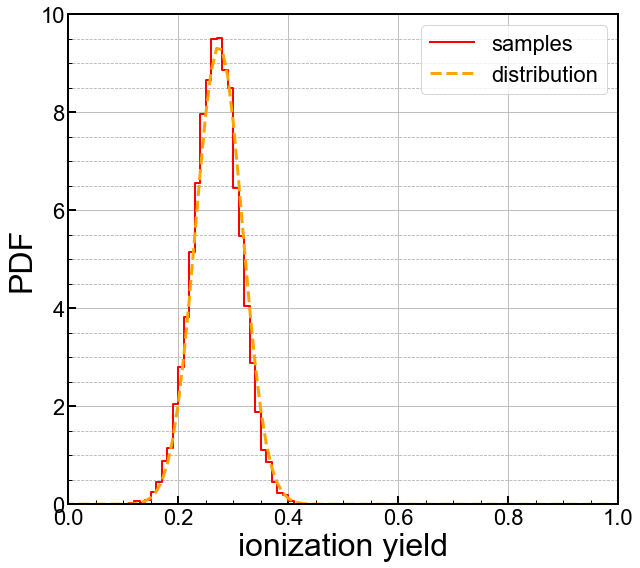

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

ax1.step(xc,n/(np.sum(n)*(x[1]-x[0])), where='mid',color='r', linestyle='-', \
         label='samples', linewidth=2)

ax1.plot(x,Qdistv(x),color='orange',linestyle='--',linewidth=3,label='distribution')

ymin = 0
ymax = 10



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'ionization yield',**axis_font)
ax1.set_ylabel('PDF',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

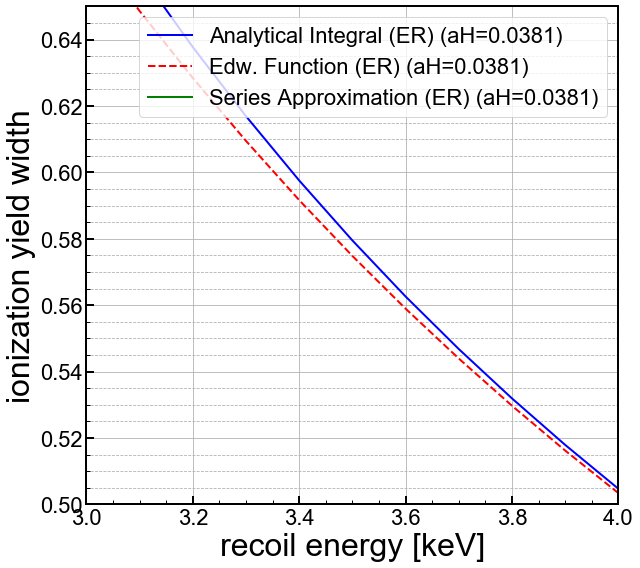

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

mask = [True, True, False, False, True, True, True, True, True]



X=np.arange(0.1,200,0.1)

ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,A=1.0,B=0.0,alpha=0.0000001)),color='b',linestyle="-",linewidth=2, \
         label='Analytical Integral (ER) (aH={})'.format(0.0381))
ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='Edw. Function (ER) (aH={})'.format(0.0381))
ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,A=1.0,B=0.0,alpha=0.0000001)),color='g',linestyle="-",linewidth=2, \
         label='Series Approximation (ER) (aH={})'.format(0.0381))

#ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
#             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)
#ax1.errorbar(E_recoil_ER[mask],sig_ER[mask], yerr=sig_ER_err[mask], \
#             color='k', marker='^',markersize=8,linestyle='none',label='Edw. ER scatters', linewidth=2)




ymin = 0.5
ymax = 0.65



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(3, 4) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('pics/analytic_integral0.png')
plt.show()

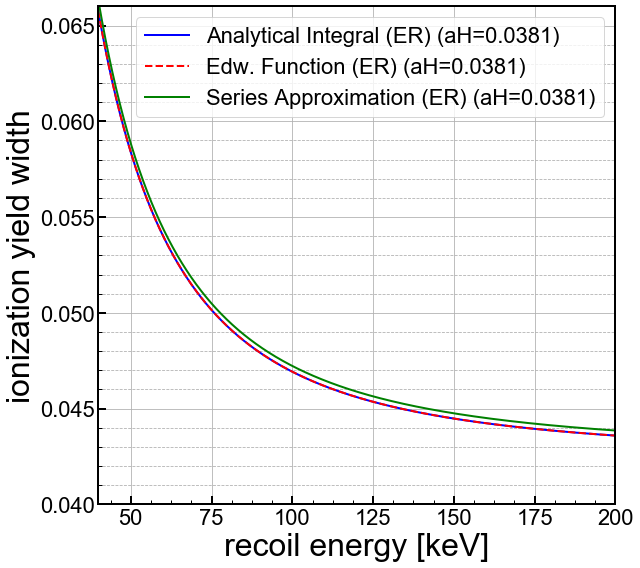

In [10]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

mask = [True, True, False, False, True, True, True, True, True]



X=np.arange(0.1,200,0.1)

ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,A=1.0,B=0.0,alpha=0.0000001)),color='b',linestyle="-",linewidth=2, \
         label='Analytical Integral (ER) (aH={})'.format(0.0381))
ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='Edw. Function (ER) (aH={})'.format(0.0381))
ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,A=1.0,B=0.0,alpha=0.0000001)),color='g',linestyle="-",linewidth=2, \
         label='Series Approximation (ER) (aH={})'.format(0.0381))

#ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
#             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)
#ax1.errorbar(E_recoil_ER[mask],sig_ER[mask], yerr=sig_ER_err[mask], \
#             color='k', marker='^',markersize=8,linestyle='none',label='Edw. ER scatters', linewidth=2)




ymin = 0.04
ymax = 0.066



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(40, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('pics/figure.png')
plt.show()

In [11]:
import h5py
filename = 'data/sims.h5'
#remove vars
f = h5py.File(filename,'r')

#save the results for the Edw fit
path='{}/'.format('ER')

xE = np.asarray(f[path+'xE'])
qbootsigs = np.asarray(f[path+'qbootsigs'])
qbootsigerrsu = np.asarray(f[path+'qbootsigerrsu'])
qbootsigerrsl = np.asarray(f[path+'qbootsigerrsl'])


f.close()

In [12]:
#get the resolutions for GGA3
import EdwRes as er

aH=0.0381
V=4.0
C=0.0
sigHv,sigIv,sigQerv,sigH_NRv,sigI_NRv,sigQnrv = er.getEdw_det_res('GGA3',V,'data/edw_res_data.txt',aH,C)

import fano_calc as fc

#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/res_calc.h5')

print(np.shape(E))

GGA3/ER/4.0/1.000E-04/0.0381/000/
(200,)


[20.06374318 10.03193885  6.68803396 ...  0.04359136  0.0435902
  0.04358904]


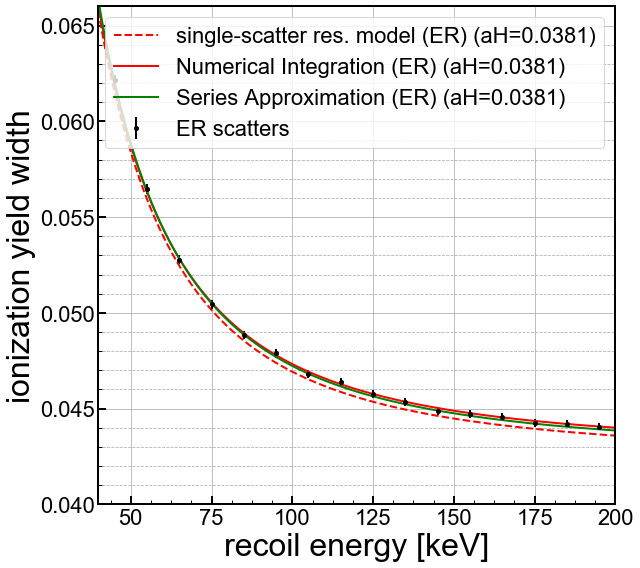

In [13]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

mask = [True, True, False, False, True, True, True, True, True]



X=np.arange(0.1,200,0.1)

print(sigQerv(X))

ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
         label='Numerical Integration (ER) (aH={})'.format(aH))
ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4,A=1.0,B=0.0,alpha=0.0000001)),color='g',linestyle="-",linewidth=2, \
         label='Series Approximation (ER) (aH={})'.format(0.0381))
ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)
#ax1.errorbar(E_recoil_ER[mask],sig_ER[mask], yerr=sig_ER_err[mask], \
#             color='k', marker='^',markersize=8,linestyle='none',label='Edw. ER scatters', linewidth=2)




ymin = 0.04
ymax = 0.066



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(40, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/ERyieldWidth_series.png')
plt.show()

GGA3/NR/4.0/5.556E-02/0.0381/000/


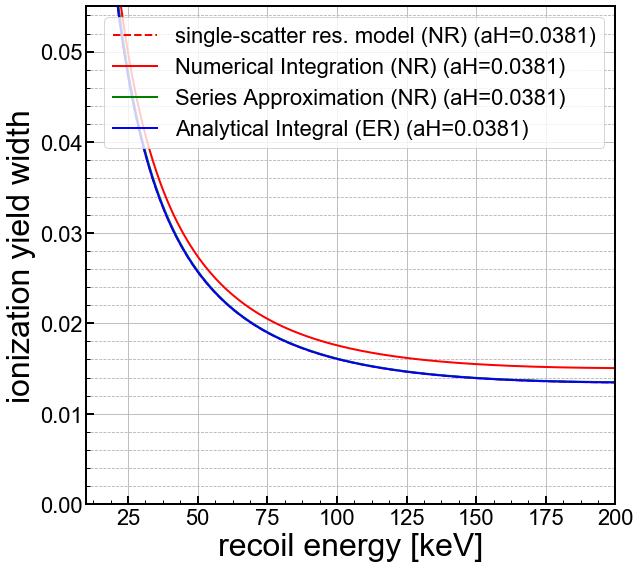

In [14]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
ax1.plot(Enr,signr,color='r',linestyle="-",linewidth=2, \
         label='Numerical Integration (NR) (aH={})'.format(aH))
ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
         label='Series Approximation (NR) (aH={})'.format(0.0381))
ax1.plot(X,np.sqrt(pd.analytical_NRQ_var(X,V=4.0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='b',linestyle="-",linewidth=2, \
         label='Analytical Integral (ER) (aH={})'.format(0.0381))



ymin = 0.0
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NRyieldWidth_series.png')
plt.show()

GGA3/NR/4.0/5.556E-02/0.0381/000/


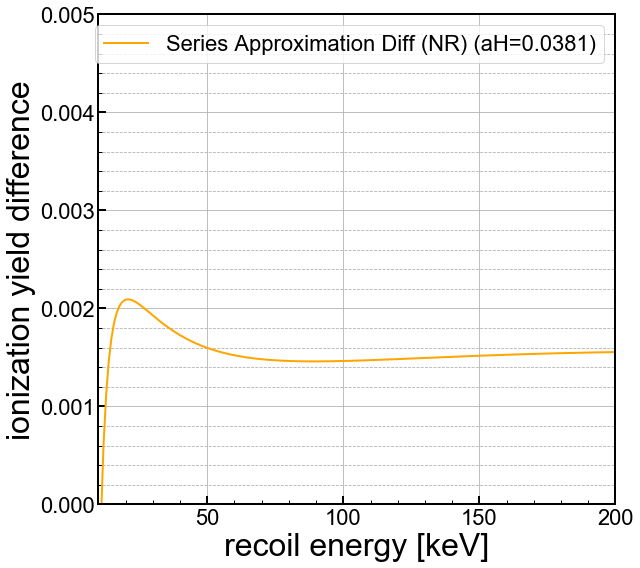

In [15]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',alpha=1/18.0,aH=0.0381,band='NR')


#ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
#         label='single-scatter res. model (NR) (aH={})'.format(aH))
#ax1.plot(xl,np.sqrt(Sigss**2),color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
#ax1.plot(Enr,signr,color='r',linestyle="-",linewidth=2, \
#         label='(C$_0$={:01.3}; m={:01.2E})'.format(0.0,0.0))
#ax1.plot(X,np.sqrt(pd.series_NRQ_var(X,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='g',linestyle="-",linewidth=2, \
#         label='Series Approximation (NR) (aH={})'.format(0.0381))

ax1.plot(Enr,signr - np.sqrt(pd.series_NRQ_var(Enr,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))),color='orange',linestyle="-",linewidth=2, \
         label='Series Approximation Diff (NR) (aH={})'.format(0.0381))


ymin = 0.0
ymax = 0.005



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield difference',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NRyieldWidth_series_diff.png')
plt.show()

In [16]:
#save the results for the simulated data
path='{}/'.format('NR')

filename = 'data/sig_diffs.h5'


#remove vars
f = h5py.File(filename,'a')

diffSig = path+'dsig' in f
diffEr = path+'Er' in f
diffV = path+'V' in f
diffaH = path+'aH' in f
diffA = path+'A' in f
diffB = path+'B' in f


if diffSig:
  del f[path+'dsig']
if diffEr:
  del f[path+'Er']
if diffV:
  del f[path+'V']
if diffaH:
  del f[path+'aH']
if diffA:
  print(np.asarray(f[path+'A']))
  del f[path+'A']
if diffB:
  del f[path+'B']



dset = f.create_dataset(path+'dsig',np.shape(signr),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = signr - np.sqrt(pd.series_NRQ_var(Enr,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0)))

dset = f.create_dataset(path+'Er',np.shape(Enr),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = Enr

dset = f.create_dataset(path+'V',(1,),dtype=np.dtype('float64').type)
dset[...] = 4.0

dset = f.create_dataset(path+'aH',(1,),dtype=np.dtype('float64').type)
dset[...] = 0.0381

dset = f.create_dataset(path+'A',(1,),dtype=np.dtype('float64').type)
dset[...] = 0.16

dset = f.create_dataset(path+'B',(1,),dtype=np.dtype('float64').type)
dset[...] = 0.18


f.close()

[0.16]


In [17]:
#let's make a callable out of the difference
import scipy.interpolate as inter

sig_corr = inter.InterpolatedUnivariateSpline(Enr, signr - np.sqrt(pd.series_NRQ_var(Enr,V=4.0,F=0,aH=0.0381,A=0.16,B=0.18,alpha=(1/18.0))), k=3)
sig_corr_v = np.vectorize(sig_corr)
print(sig_corr_v(150))

0.0015163372389498722


In [18]:
#got to do the hard thing and try to map this out a bit. Here are the parameters and ranges:
#A: 0.01 range around 0.16
#B: 0.01 range around 0.18
#aH: 0.001 range around 0.0381
#mu: 0.05 range around 1

Etest = 60.0
Nsamp = 3
A0 = 0.16
dA = 0.01
B0 = 0.18
dB = 0.01
aH0 = 0.0381
daH = 0.001
mu0 = 1.0
dmu = 0.05
Avec = np.concatenate(([A0],np.random.uniform(A0-dA,A0+dA,Nsamp)))
Bvec = np.concatenate(([B0],np.random.uniform(B0-dB,B0+dB,Nsamp)))
aHvec = np.concatenate(([aH0],np.random.uniform(aH0-daH,aH0+daH,Nsamp)))
muvec = np.concatenate(([mu0],np.random.uniform(mu0-dmu,mu0+dmu,Nsamp)))
print(Avec)
print(Bvec)
print(aHvec)
print(muvec)
print([x for x in enumerate(muvec)])

[0.16       0.16224957 0.15404551 0.15691587]
[0.18       0.17522894 0.1803306  0.18640188]
[0.0381     0.03829484 0.03896159 0.03804183]
[1.         0.97300745 0.96224719 0.96123719]
[(0, 1.0), (1, 0.9730074546387545), (2, 0.9622471860442127), (3, 0.9612371924717716)]


In [19]:
#test variation with A
sig_res_A = np.zeros(np.shape(Avec))
sig_res_A_func = np.zeros(np.shape(Avec))


for i,As in enumerate(Avec):

  start = time.time()
  sig_res_A[i] = pd.sigmomEdw(Etest,band='NR',label='GGA3',F=0.000001,V=mu0*4.0,aH=aH0,alpha=(1/18.0),A=As,B=B0)
  end = time.time()
  print('Normalization and Integration: {:1.5f} sec.'.format(end-start))
  sig_res_A_func[i] = np.sqrt(pd.series_NRQ_var(Etest,V=mu0*4.0,F=0,aH=aH0,A=As,B=B0,alpha=(1/18.0))) + sig_corr(Etest)
 


Normalization and Integration: 36.43825 sec.
Normalization and Integration: 35.22540 sec.
Normalization and Integration: 40.60988 sec.
Normalization and Integration: 36.64322 sec.


In [20]:
print((sig_res_A-sig_res_A_func)/sig_res_A)

[-1.33747351e-07  1.17058446e-03 -3.14898070e-03 -1.62199298e-03]


In [21]:
#test variation with B
sig_res_B = np.zeros(np.shape(Bvec))
sig_res_B_func = np.zeros(np.shape(Bvec))


for i,Bs in enumerate(Bvec):

  start = time.time()
  sig_res_B[i] = pd.sigmomEdw(Etest,band='NR',label='GGA3',F=0.000001,V=mu0*4.0,aH=aH0,alpha=(1/18.0),A=A0,B=Bs)
  end = time.time()
  print('Normalization and Integration: {:1.5f} sec.'.format(end-start))
  sig_res_B_func[i] = np.sqrt(pd.series_NRQ_var(Etest,V=mu0*4.0,F=0,aH=aH0,A=A0,B=Bs,alpha=(1/18.0))) + sig_corr(Etest)

Normalization and Integration: 36.05416 sec.
Normalization and Integration: 36.12800 sec.
Normalization and Integration: 36.09614 sec.
Normalization and Integration: 35.73333 sec.


In [22]:
print((sig_res_B-sig_res_B_func)/sig_res_B)

[-1.33747351e-07 -3.42339467e-03  2.39147046e-04  4.68066033e-03]


In [23]:
#test variation with aH
sig_res_aH = np.zeros(np.shape(aHvec))
sig_res_aH_func = np.zeros(np.shape(aHvec))


for i,aHs in enumerate(aHvec):

  start = time.time()
  sig_res_aH[i] = pd.sigmomEdw(Etest,band='NR',label='GGA3',F=0.000001,V=mu0*4.0,aH=aHs,alpha=(1/18.0),A=A0,B=B0)
  end = time.time()
  print('Normalization and Integration: {:1.5f} sec.'.format(end-start))
  sig_res_aH_func[i] = np.sqrt(pd.series_NRQ_var(Etest,V=mu0*4.0,F=0,aH=aHs,A=A0,B=B0,alpha=(1/18.0))) + sig_corr(Etest)

Normalization and Integration: 32.72308 sec.
Normalization and Integration: 32.56884 sec.
Normalization and Integration: 32.35488 sec.
Normalization and Integration: 38.23050 sec.


In [24]:
print((sig_res_aH-sig_res_aH_func)/sig_res_aH)

[-1.33747351e-07  1.44768886e-04  6.42433597e-04 -4.33447768e-05]


In [25]:
#test variation with mu
sig_res_mu = np.zeros(np.shape(muvec))
sig_res_mu_func = np.zeros(np.shape(muvec))


for i,mus in enumerate(muvec):

  start = time.time()
  sig_res_mu[i] = pd.sigmomEdw(Etest,band='NR',label='GGA3',F=0.000001,V=mus*4.0,aH=aH0,alpha=(1/18.0),A=A0,B=B0)
  end = time.time()
  print('Normalization and Integration: {:1.5f} sec.'.format(end-start))
  sig_res_mu_func[i] = np.sqrt(pd.series_NRQ_var(Etest,V=mus*4.0,F=0,aH=aH0,A=A0,B=B0,alpha=(1/18.0))) + sig_corr(Etest)

Normalization and Integration: 38.95466 sec.
Normalization and Integration: 38.91217 sec.
Normalization and Integration: 39.12636 sec.
Normalization and Integration: 38.74482 sec.


In [26]:
print((sig_res_mu-sig_res_mu_func)/sig_res_mu)

[-1.33747351e-07 -1.22964108e-03 -1.72777620e-03 -1.77476972e-03]


In [27]:
permute=np.array(np.meshgrid(Avec, Bvec, aHvec,muvec)).T.reshape(-1,4)
print(np.shape(permute))

(256, 4)


In [28]:
print(6**4/60)

21.6
